In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as F
import matplotlib.pyplot as plt
from rff.layers import GaussianEncoding

Using Scenario B, 15s dataset for classifcation on traffic type (7 classes)

In [6]:
df = pd.read_csv(r"C:\Users\smbm2\projects\TrafficFlowForecasting\warins_experiments\data\Scenario B\TimeBasedFeatures-Dataset-15s-AllinOne.csv") # personal
# df = pd.read_csv(r"C:\python\research\csv_datasets\Scenario B\TimeBasedFeatures-Dataset-15s-AllinOne.csv") # for IR

df.head()

,Unnamed: 0,duration,total_fiat,total_biat,min_fiat,min_biat,max_fiat,max_biat,mean_fiat,mean_biat,...,std_flowiat,min_active,mean_active,max_active,std_active,min_idle,mean_idle,max_idle,std_idle,class1
0,0,9368711.0,16.0,4.0,1564818.0,1549373.0,190205.285714,203290.456522,389822.391917,370323.719754,...,267600.198443,1871488.0,1.983656e+06,2195089.0,1.832197e+05,1234883.0,1420565.0,1523088.0,161096.539275,CHAT
1,1,7340238.0,18.0,4.0,1567554.0,1527893.0,165686.977273,186914.846154,317267.548742,304370.651301,...,221462.862028,1491627.0,3.572433e+06,5653239.0,2.942704e+06,1131498.0,1324636.0,1517774.0,273138.379008,CHAT
2,2,4644225.0,29.0,15.0,1270547.0,1079974.0,165865.178571,195302.130435,329473.126261,300492.588227,...,217475.425246,1758922.0,1.758922e+06,1758922.0,0.000000e+00,1079974.0,1079974.0,1079974.0,0.000000,CHAT
3,3,4978735.0,19.0,8.0,2492050.0,2457286.0,239543.250000,276596.388889,612435.304238,628339.573544,...,436959.716436,1710925.0,2.382905e+06,3054885.0,9.503232e+05,1346073.0,1894031.5,2441990.0,774930.342317,CHAT
4,4,11838189.0,19.0,10.0,3094089.0,3093543.0,243766.500000,295954.725000,599721.781709,625632.703972,...,436129.639296,1747431.0,2.400446e+06,3240696.0,6.232744e+05,1394455.0,1983227.0,3042717.0,725987.829075,CHAT


In [7]:
df = df.drop(columns=['Unnamed: 0'])
df.head()

,duration,total_fiat,total_biat,min_fiat,min_biat,max_fiat,max_biat,mean_fiat,mean_biat,flowPktsPerSecond,...,std_flowiat,min_active,mean_active,max_active,std_active,min_idle,mean_idle,max_idle,std_idle,class1
0,9368711.0,16.0,4.0,1564818.0,1549373.0,190205.285714,203290.456522,389822.391917,370323.719754,10.353612,...,267600.198443,1871488.0,1.983656e+06,2195089.0,1.832197e+05,1234883.0,1420565.0,1523088.0,161096.539275,CHAT
1,7340238.0,18.0,4.0,1567554.0,1527893.0,165686.977273,186914.846154,317267.548742,304370.651301,11.580006,...,221462.862028,1491627.0,3.572433e+06,5653239.0,2.942704e+06,1131498.0,1324636.0,1517774.0,273138.379008,CHAT
2,4644225.0,29.0,15.0,1270547.0,1079974.0,165865.178571,195302.130435,329473.126261,300492.588227,11.412022,...,217475.425246,1758922.0,1.758922e+06,1758922.0,0.000000e+00,1079974.0,1079974.0,1079974.0,0.000000,CHAT
3,4978735.0,19.0,8.0,2492050.0,2457286.0,239543.250000,276596.388889,612435.304238,628339.573544,8.034169,...,436959.716436,1710925.0,2.382905e+06,3054885.0,9.503232e+05,1346073.0,1894031.5,2441990.0,774930.342317,CHAT
4,11838189.0,19.0,10.0,3094089.0,3093543.0,243766.500000,295954.725000,599721.781709,625632.703972,7.602514,...,436129.639296,1747431.0,2.400446e+06,3240696.0,6.232744e+05,1394455.0,1983227.0,3042717.0,725987.829075,CHAT


In [8]:
le = LabelEncoder()
df['class1'] = le.fit_transform(df['class1'])
df.head()

,duration,total_fiat,total_biat,min_fiat,min_biat,max_fiat,max_biat,mean_fiat,mean_biat,flowPktsPerSecond,...,std_flowiat,min_active,mean_active,max_active,std_active,min_idle,mean_idle,max_idle,std_idle,class1
0,9368711.0,16.0,4.0,1564818.0,1549373.0,190205.285714,203290.456522,389822.391917,370323.719754,10.353612,...,267600.198443,1871488.0,1.983656e+06,2195089.0,1.832197e+05,1234883.0,1420565.0,1523088.0,161096.539275,1
1,7340238.0,18.0,4.0,1567554.0,1527893.0,165686.977273,186914.846154,317267.548742,304370.651301,11.580006,...,221462.862028,1491627.0,3.572433e+06,5653239.0,2.942704e+06,1131498.0,1324636.0,1517774.0,273138.379008,1
2,4644225.0,29.0,15.0,1270547.0,1079974.0,165865.178571,195302.130435,329473.126261,300492.588227,11.412022,...,217475.425246,1758922.0,1.758922e+06,1758922.0,0.000000e+00,1079974.0,1079974.0,1079974.0,0.000000,1
3,4978735.0,19.0,8.0,2492050.0,2457286.0,239543.250000,276596.388889,612435.304238,628339.573544,8.034169,...,436959.716436,1710925.0,2.382905e+06,3054885.0,9.503232e+05,1346073.0,1894031.5,2441990.0,774930.342317,1
4,11838189.0,19.0,10.0,3094089.0,3093543.0,243766.500000,295954.725000,599721.781709,625632.703972,7.602514,...,436129.639296,1747431.0,2.400446e+06,3240696.0,6.232744e+05,1394455.0,1983227.0,3042717.0,725987.829075,1


In [9]:
df['class1'].value_counts()

6    5097
0    5000
2    2950
1    2086
4    1928
5     957
3     740
Name: class1, dtype: int64

In [10]:
df.isna().any()

duration              False
total_fiat            False
total_biat            False
min_fiat              False
min_biat              False
max_fiat              False
max_biat              False
mean_fiat             False
mean_biat             False
flowPktsPerSecond     False
flowBytesPerSecond    False
min_flowiat           False
max_flowiat           False
mean_flowiat          False
std_flowiat           False
min_active            False
mean_active           False
max_active            False
std_active            False
min_idle              False
mean_idle             False
max_idle              False
std_idle              False
class1                False
dtype: bool

### Try standardizing before next time

In [11]:
class vpnDataset(Dataset):
    def __init__(self, df, target = 'class1'):
        self.n = df.shape[0]
        
        self.y = df[target].astype(np.int64).values

        self.x = df.drop(columns=[target]).astype(np.float32).values

    def __len__(self):
        return self.n
    
    def __getitem__(self, index):
        return self.x[index], self.y[index]


In [12]:
vpn_dataset = vpnDataset(df)

In [13]:
len(vpn_dataset)

18758

In [14]:
vpn_dataset[:5]

(array([[9.36871100e+06, 1.60000000e+01, 4.00000000e+00, 1.56481800e+06,
         1.54937300e+06, 1.90205281e+05, 2.03290453e+05, 3.89822406e+05,
         3.70323719e+05, 1.03536119e+01, 4.80268848e+03, 4.00000000e+00,
         1.52308800e+06, 9.75907422e+04, 2.67600188e+05, 1.87148800e+06,
         1.98365638e+06, 2.19508900e+06, 1.83219703e+05, 1.23488300e+06,
         1.42056500e+06, 1.52308800e+06, 1.61096547e+05],
        [7.34023800e+06, 1.80000000e+01, 4.00000000e+00, 1.56755400e+06,
         1.52789300e+06, 1.65686984e+05, 1.86914844e+05, 3.17267562e+05,
         3.04370656e+05, 1.15800056e+01, 4.34018604e+03, 4.00000000e+00,
         1.51777400e+06, 8.73837891e+04, 2.21462859e+05, 1.49162700e+06,
         3.57243300e+06, 5.65323900e+06, 2.94270400e+06, 1.13149800e+06,
         1.32463600e+06, 1.51777400e+06, 2.73138375e+05],
        [4.64422500e+06, 2.90000000e+01, 1.50000000e+01, 1.27054700e+06,
         1.07997400e+06, 1.65865172e+05, 1.95302125e+05, 3.29473125e+05,
        

In [13]:
train_size = int(0.7*len(vpn_dataset))
print(train_size)
test_size = len(vpn_dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(vpn_dataset, [train_size, test_size])
print(len(train_dataset), len(test_dataset))

13130
13130 5628


In [14]:
batch_size = 256
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True) 

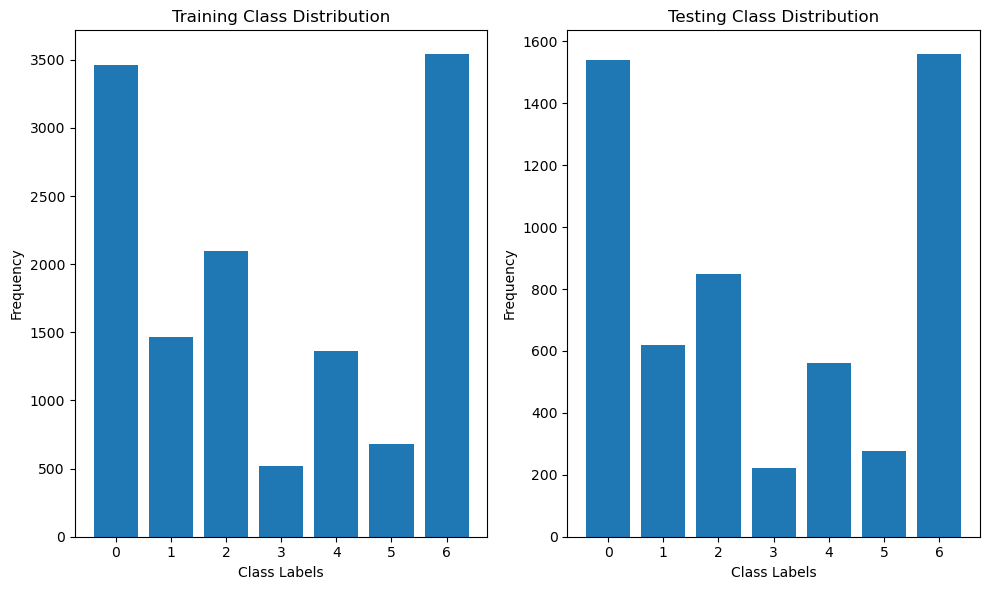

In [15]:
#to be sure that the distributions of classes are close to the same (random_split is actually randomly splitting)

from collections import Counter

train_labels = []
test_labels = []
for input, labels in train_dataloader:
    train_labels.extend(labels.flatten().tolist())

for input, labels in test_dataloader:
    test_labels.extend(labels.flatten().tolist())

train_distribution = Counter(train_labels)
test_distribution = Counter(test_labels)


plt.figure(figsize=(10, 6))

# Plotting training distribution
plt.subplot(1, 2, 1)
plt.bar(train_distribution.keys(), train_distribution.values())
plt.title('Training Class Distribution')
plt.xlabel('Class Labels')
plt.ylabel('Frequency')

# Plotting testing distribution
plt.subplot(1, 2, 2)
plt.bar(test_distribution.keys(), test_distribution.values())
plt.title('Testing Class Distribution')
plt.xlabel('Class Labels')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [14]:
for batch_idx, (inputs, targets) in enumerate(train_dataloader):
    # `inputs` will contain the input features for the current batch
    # `targets` will contain the corresponding target labels

    # Print the batch index and the sizes of inputs and targets
    print(f"Batch Index: {batch_idx}")
    print("Input sizes:", inputs.size())
    print("Target sizes:", targets.size())

    # You can also print the actual data if you want to see the values
    print("Inputs:")
    print(inputs)
    print("Targets:")
    print(targets)

Batch Index: 0
Input sizes: torch.Size([256, 23])
Target sizes: torch.Size([256])
Inputs:
tensor([[ 1.4998e+07,  1.0700e+02,  2.0000e+00,  ...,  0.0000e+00,
         -1.0000e+00,  0.0000e+00],
        [ 1.0538e+07,  5.0000e+00,  1.3000e+01,  ...,  9.2895e+06,
          9.2895e+06,  0.0000e+00],
        [ 1.4870e+07,  6.0600e+02, -1.0000e+00,  ...,  1.3700e+07,
          1.3737e+07,  0.0000e+00],
        ...,
        [ 1.4999e+07,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
         -1.0000e+00,  0.0000e+00],
        [ 4.3000e+01, -1.0000e+00, -1.0000e+00,  ...,  0.0000e+00,
         -1.0000e+00,  0.0000e+00],
        [ 1.4578e+07,  5.8000e+01,  1.0000e+00,  ...,  1.4400e+07,
          1.4403e+07,  0.0000e+00]])
Targets:
tensor([6., 0., 2., 0., 0., 3., 6., 6., 0., 0., 5., 1., 6., 6., 6., 6., 6., 1.,
        1., 6., 6., 0., 5., 6., 0., 0., 0., 2., 6., 6., 1., 6., 0., 0., 0., 2.,
        3., 3., 2., 1., 0., 0., 5., 2., 6., 6., 6., 6., 6., 6., 1., 0., 0., 6.,
        5., 2., 3., 0., 0., 0

data is prepared. Now for the model

In [16]:
class SelfAttention(nn.Module):
    def __init__(self, embed_size, heads):
        super(SelfAttention, self).__init__()

        self.embed_size = embed_size
        self.heads = heads
        self.head_dim = embed_size // heads
        assert(self.head_dim * heads == embed_size), "Embed size needs to be div by heads"
        self.values = nn.Linear(self.head_dim, self.head_dim, bias=False)
        self.keys =nn.Linear(self.head_dim, self.head_dim, bias=False)
        self.queries = nn.Linear(self.head_dim, self.head_dim, bias=False)
        self.fc_out = nn.Linear(heads*self.head_dim, embed_size)

    def forward(self, values, keys, query):
        N = query.shape[0]
        value_len, key_len, query_len = values.shape[1], keys.shape[1], query.shape[1]

        values = values.reshape(N, value_len, self.heads, self.head_dim)
        keys = keys.reshape(N, key_len, self.heads, self.head_dim)
        queries = query.reshape(N, key_len, self.heads, self.head_dim)
        energy = torch.einsum("nqhd,nkhd->nhqk", [queries, keys])

        # if mask is not None:
        #     energy = energy.masked_fill(mask == 0, float("-1e20"))

        attention = torch.softmax(energy / (self.embed_size ** (1/2)), dim=3)
        out = torch.einsum("nhql,nlhd->nqhd", [attention, values]).reshape(N, query_len, self.heads*self.head_dim)
        out = self.fc_out(out)
        return out
    
class TransformerBlock(nn.Module):
    def __init__(self, embed_size, heads, dropout, forward_expansion):
        super(TransformerBlock, self).__init__()

        self.attention = SelfAttention(embed_size, heads)
        self.norm1 = nn.LayerNorm(embed_size)
        self.norm2 = nn.LayerNorm(embed_size)

        self.feed_forward = nn.Sequential(nn.Linear(embed_size, forward_expansion*embed_size),
                                          nn.ReLU(),
                                          nn.Linear(forward_expansion*embed_size, embed_size)
                                          )
        self.dropout = nn.Dropout(dropout)

    def forward(self,value,key,query):
        attention = self.attention(value, key, query)
        x = self.dropout(self.norm1(attention + query))
        forward = self.feed_forward(x)
        out = self.dropout(self.norm2(forward + x))
        return out

class Encoder(nn.Module):
    def __init__(self,
                 embed_size,
                 num_layers,
                 heads,
                 forward_expansion,
                 encoder_dropout
    ):
        super(Encoder, self).__init__()
        
        self.layers = nn.ModuleList(
            [
                TransformerBlock(
                    embed_size,
                    heads,
                    dropout=encoder_dropout,
                    forward_expansion=forward_expansion
                )
                for _ in range(num_layers)
            ]
        )


    def forward(self, x):
        for layer in self.layers:
            #running embeddings through transformer block
            #keys, values, and query are all the same initially (x)
            x = layer(x, x, x)
     
        return x #same dimensions as going in 


In [27]:
class Embeddings(nn.Module):
    def __init__(self, sigma, embed_size, input_size, embedding_dropout, n_features, rff_on):
        super(Embeddings, self).__init__()

        self.rff_on = rff_on

        if self.rff_on:
            self.rffs = nn.ModuleList([GaussianEncoding(sigma=sigma, input_size=input_size, encoded_size=embed_size//2) for x in range(n_features)])
            self.dropout = nn.Dropout(embedding_dropout)
            self.mlp_in = embed_size
        else:
            self.mlp_in = input_size

        self.embeddings = nn.ModuleList([nn.Linear(in_features=self.mlp_in, out_features=embed_size) for x in range(n_features)])

    def forward(self, x):
        x = x.unsqueeze(2) #(batch_size, n_features) -> (batch_size, n_features, 1)
        rff_vectors = []
        if self.rff_on:
            for i, r in enumerate(self.rffs):
                input = x[:,i,:]
                out = r(input)
                rff_vectors.append(out)
        
            x = torch.stack(rff_vectors, dim=1)
        
        embeddings = []
        for i, e in enumerate(self.embeddings):
            goin_in = x[:,i,:]
            goin_out = e(goin_in)
            embeddings.append(goin_out)

        x = torch.stack(embeddings, dim=1)

        return x

In [19]:
class classificationHead(nn.Module):
    def __init__(self, n_features, embed_size, dropout, num_target_classes):
        super(classificationHead, self).__init__()
        
        #flattening the embeddings out so each sample in batch is represented with a 460 dimensional vector
        self.n_features = n_features*embed_size
        self.lin1 = nn.Linear(self.n_features, self.n_features)
        self.drop = nn.Dropout(dropout)
        self.lin2 = nn.Linear(self.n_features, num_target_classes)
        
        self.relu = nn.ReLU()
        # self.softmax = nn.Softmax()
        self.initialize_weights()

    def initialize_weights(self): #he_initialization.
        torch.nn.init.kaiming_normal_(self.lin1.weight, nonlinearity='relu')
        torch.nn.init.zeros_(self.lin1.bias)

        torch.nn.init.kaiming_normal_(self.lin2.weight, nonlinearity='relu')
        torch.nn.init.zeros_(self.lin2.bias)

    def forward(self, x):

        x= torch.reshape(x, (-1, self.n_features))

        x = self.lin1(x)
        x = self.relu(x)
        x = self.drop(x)
        x = self.lin2(x)
        # x = self.softmax(x)
        # print(x.shape)
  
        return x

In [18]:
class LSTM_aggregation(nn.Module):
    def __init__(self, input_size, num_layers, batch_sz):
        super(LSTM_aggregation, self).__init__()
        
        self.embed_size = input_size
        self.num_layers = num_layers
        self.batch_sz = batch_sz
        self.aggregation = nn.LSTM(
                input_size = self.embed_size,
                hidden_size = self.embed_size,
                num_layers = self.num_layers,
                batch_first = True
            )
    def forward(self, x):
        x, _ = self.aggregation(x)
        
        return x

In [20]:
class vpnClassifier(nn.Module):
    def __init__(self, 
                 rff_on = True,
                 sigma=4,
                 embed_size=20,
                 input_size=1,
                 embedding_dropout = 0,
                 n_features=23,
                 num_layers=2,
                 heads=4,
                 forward_expansion=4,
                 encoder_dropout=0,
                 aggregation_on = True,
                 lstm_layers=1,
                 batch_sz = 256,
                 num_target_classes = 7,
                 classification_dropout = 0
                 ):
        super(vpnClassifier, self).__init__()
        self.aggregation_on = aggregation_on

        self.embeddings = Embeddings(rff_on=rff_on, sigma=sigma, embed_size=embed_size, input_size=input_size, embedding_dropout=embedding_dropout, n_features=n_features)
        self.encoder = Encoder(embed_size=embed_size, num_layers=num_layers, heads=heads, forward_expansion=forward_expansion, encoder_dropout=encoder_dropout)
        if self.aggregation_on:
            self.aggregation = LSTM_aggregation(input_size=embed_size, num_layers=lstm_layers, batch_sz=batch_sz)
        self.classifying_head = classificationHead(n_features=n_features, embed_size=embed_size, dropout=classification_dropout, num_target_classes=num_target_classes)
        
    def forward(self, x):
        x = self.embeddings(x)

        x = self.encoder(x)

        if self.aggregation_on:
            x = self.aggregation(x)
            
        x = self.classifying_head(x)
        return x


In [21]:
def train(dataloader, model, loss_fn, optimizer):
    model.train()
    total_loss = 0
    total_correct = 0
    total_samples = 0

    for batch_idx, (inputs, targets) in enumerate(dataloader):
        # print(batch_idx, inputs, targets)
        pred = model(inputs)
        # print(pred)
        # print(targets)
        # print(pred.squeeze(0))
        loss = loss_fn(pred, targets)
        total_loss+= loss.item()

        # Calculate accuracy
        y_pred_softmax = torch.log_softmax(pred, dim =1)
        _, y_pred_labels = torch.max(y_pred_softmax, dim=1)
        total_correct += (y_pred_labels == targets).sum().item()
        total_samples += targets.size(0)

        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

    avg_loss = total_loss/len(dataloader)
    accuracy = total_correct / total_samples
    return avg_loss, accuracy
    

def test(dataloader, model, loss_fn):
  model.eval()
  tot = 0
  total_correct = 0
  total_samples = 0
  with torch.no_grad():
    for batch_idx, (inputs, targets) in enumerate(dataloader):
      #compute prediction error
      pred = model(inputs)
      test_loss = loss_fn(pred, targets)
      tot += test_loss

      # Calculate accuracy
      y_pred_softmax = torch.log_softmax(pred, dim =1)
      _, y_pred_labels = torch.max(y_pred_softmax, dim=1)
      total_correct += (y_pred_labels == targets).sum().item()
      total_samples += targets.size(0)

  avg = tot/len(dataloader)
  accuracy = total_correct / total_samples

  return avg, accuracy

# EXPERIMENTS

In [24]:
#No RFF, No aggregation, 1 encoder layer, no regularization. VERY BASIC
model = vpnClassifier(rff_on=False, num_layers=1, aggregation_on=False, heads=1)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.RMSprop(params=model.parameters(), lr=0.0001, momentum=0.9)

epochs = 50
train_losses = []
train_accuracies = []
test_losses = []
test_accuracies = []
for t in range(epochs):
  train_loss, train_accuracy = train(train_dataloader, model, loss_fn, optimizer)
  test_loss, test_accuracy = test(test_dataloader, model, loss_fn)
  train_losses.append(train_loss)
  train_accuracies.append(train_accuracy)
  test_losses.append(test_loss)
  test_accuracies.append(test_accuracy)
  print(f"Epoch {t+1}/{epochs}, Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}, Train Accuracy: {train_accuracy:.4f}, Test Accuracy: {test_accuracy:.4f}")

# Plotting the loss curves
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, epochs+1), train_losses, label='Train Loss')
plt.plot(range(1, epochs+1), test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Test Loss Curve')
plt.legend()

# Plotting the accuracy curves
plt.subplot(1, 2, 2)
plt.plot(range(1, epochs+1), train_accuracies, label='Train Accuracy')
plt.plot(range(1, epochs+1), test_accuracies, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Test Accuracy Curve')
plt.legend()

plt.tight_layout()
plt.show()

print(f"Best accuracy: {max(test_accuracies)}")

Epoch 1/50, Train Loss: 1.0558, Test Loss: 0.8196, Train Accuracy: 0.6543, Test Accuracy: 0.7122
Epoch 2/50, Train Loss: 0.7890, Test Loss: 0.7470, Train Accuracy: 0.7153, Test Accuracy: 0.7287
Epoch 3/50, Train Loss: 0.7216, Test Loss: 0.7340, Train Accuracy: 0.7334, Test Accuracy: 0.7180


KeyboardInterrupt: 

Epoch 1/50, Train Loss: 1.0192, Test Loss: 0.9109, Train Accuracy: 0.6384, Test Accuracy: 0.6713
Epoch 2/50, Train Loss: 0.8146, Test Loss: 0.8180, Train Accuracy: 0.6983, Test Accuracy: 0.6990
Epoch 3/50, Train Loss: 0.7729, Test Loss: 0.7782, Train Accuracy: 0.7132, Test Accuracy: 0.7107
Epoch 4/50, Train Loss: 0.7505, Test Loss: 0.7751, Train Accuracy: 0.7238, Test Accuracy: 0.7244
Epoch 5/50, Train Loss: 0.7350, Test Loss: 0.7517, Train Accuracy: 0.7321, Test Accuracy: 0.7303
Epoch 6/50, Train Loss: 0.7214, Test Loss: 0.7437, Train Accuracy: 0.7355, Test Accuracy: 0.7349
Epoch 7/50, Train Loss: 0.7068, Test Loss: 0.7349, Train Accuracy: 0.7396, Test Accuracy: 0.7381
Epoch 8/50, Train Loss: 0.6971, Test Loss: 0.7419, Train Accuracy: 0.7421, Test Accuracy: 0.7342
Epoch 9/50, Train Loss: 0.6901, Test Loss: 0.7153, Train Accuracy: 0.7453, Test Accuracy: 0.7422
Epoch 10/50, Train Loss: 0.6846, Test Loss: 0.7136, Train Accuracy: 0.7473, Test Accuracy: 0.7400
Epoch 11/50, Train Loss: 0.67

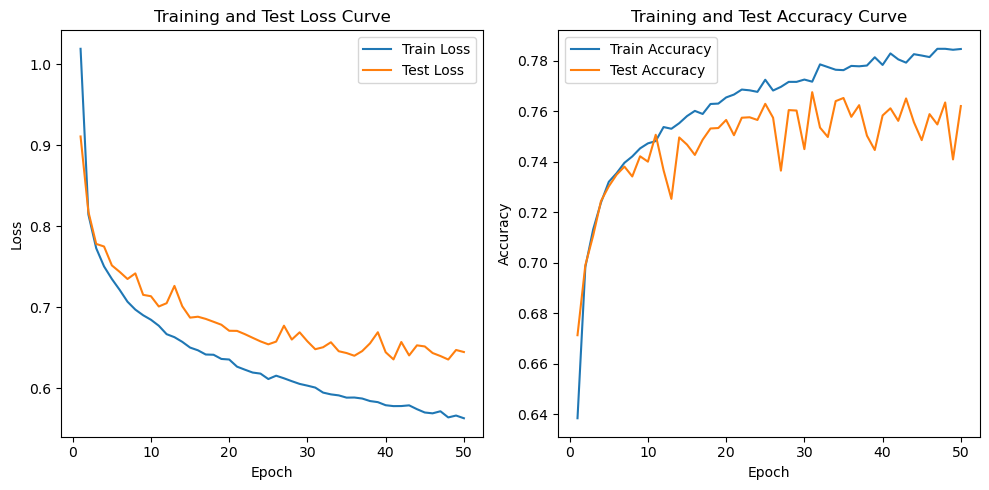

Best accuracy: 0.767590618336887


In [86]:
#Same Basic but no momentum
model = vpnClassifier(rff_on=False, num_layers=1, aggregation_on=False, heads=1)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.RMSprop(params=model.parameters(), lr=0.0001)

epochs = 50
train_losses = []
train_accuracies = []
test_losses = []
test_accuracies = []
for t in range(epochs):
  train_loss, train_accuracy = train(train_dataloader, model, loss_fn, optimizer)
  test_loss, test_accuracy = test(test_dataloader, model, loss_fn)
  train_losses.append(train_loss)
  train_accuracies.append(train_accuracy)
  test_losses.append(test_loss)
  test_accuracies.append(test_accuracy)
  print(f"Epoch {t+1}/{epochs}, Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}, Train Accuracy: {train_accuracy:.4f}, Test Accuracy: {test_accuracy:.4f}")

# Plotting the loss curves
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, epochs+1), train_losses, label='Train Loss')
plt.plot(range(1, epochs+1), test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Test Loss Curve')
plt.legend()

# Plotting the accuracy curves
plt.subplot(1, 2, 2)
plt.plot(range(1, epochs+1), train_accuracies, label='Train Accuracy')
plt.plot(range(1, epochs+1), test_accuracies, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Test Accuracy Curve')
plt.legend()

plt.tight_layout()
plt.show()

print(f"Best accuracy: {max(test_accuracies)}")

Epoch 1/50, Train Loss: 1.3081, Test Loss: 0.9885, Train Accuracy: 0.5515, Test Accuracy: 0.6603
Epoch 2/50, Train Loss: 0.9063, Test Loss: 0.8642, Train Accuracy: 0.6748, Test Accuracy: 0.6944
Epoch 3/50, Train Loss: 0.8243, Test Loss: 0.8070, Train Accuracy: 0.7039, Test Accuracy: 0.7162
Epoch 4/50, Train Loss: 0.7799, Test Loss: 0.7777, Train Accuracy: 0.7225, Test Accuracy: 0.7226
Epoch 5/50, Train Loss: 0.7491, Test Loss: 0.7538, Train Accuracy: 0.7336, Test Accuracy: 0.7315
Epoch 6/50, Train Loss: 0.7249, Test Loss: 0.7351, Train Accuracy: 0.7382, Test Accuracy: 0.7280
Epoch 7/50, Train Loss: 0.7078, Test Loss: 0.7204, Train Accuracy: 0.7415, Test Accuracy: 0.7424
Epoch 8/50, Train Loss: 0.6940, Test Loss: 0.7045, Train Accuracy: 0.7472, Test Accuracy: 0.7505
Epoch 9/50, Train Loss: 0.6789, Test Loss: 0.6942, Train Accuracy: 0.7539, Test Accuracy: 0.7550
Epoch 10/50, Train Loss: 0.6681, Test Loss: 0.6869, Train Accuracy: 0.7579, Test Accuracy: 0.7537
Epoch 11/50, Train Loss: 0.66

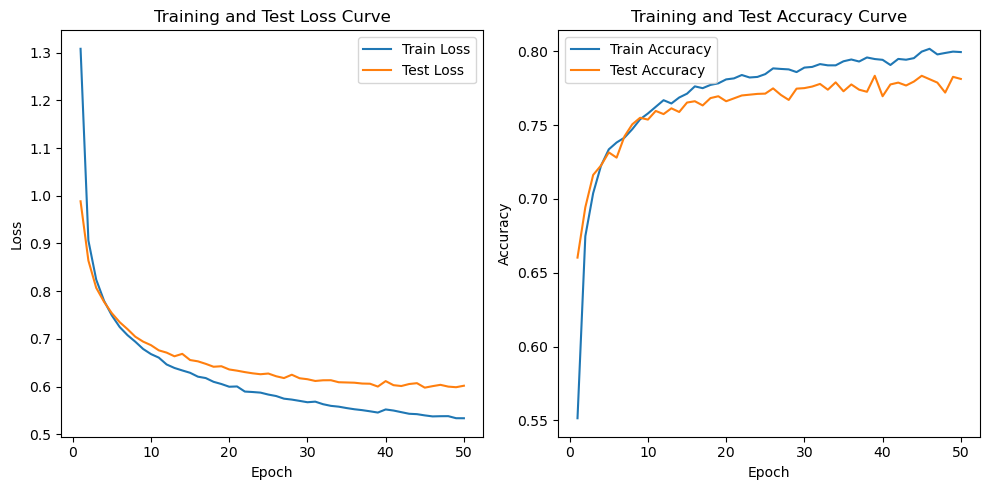

Best accuracy: 0.7834044065387349


In [87]:
#Using Adam now
model = vpnClassifier(rff_on=False, num_layers=1, aggregation_on=False, heads=1)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model.parameters(), lr=0.0001)

epochs = 50
train_losses = []
train_accuracies = []
test_losses = []
test_accuracies = []
for t in range(epochs):
  train_loss, train_accuracy = train(train_dataloader, model, loss_fn, optimizer)
  test_loss, test_accuracy = test(test_dataloader, model, loss_fn)
  train_losses.append(train_loss)
  train_accuracies.append(train_accuracy)
  test_losses.append(test_loss)
  test_accuracies.append(test_accuracy)
  print(f"Epoch {t+1}/{epochs}, Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}, Train Accuracy: {train_accuracy:.4f}, Test Accuracy: {test_accuracy:.4f}")

# Plotting the loss curves
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, epochs+1), train_losses, label='Train Loss')
plt.plot(range(1, epochs+1), test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Test Loss Curve')
plt.legend()

# Plotting the accuracy curves
plt.subplot(1, 2, 2)
plt.plot(range(1, epochs+1), train_accuracies, label='Train Accuracy')
plt.plot(range(1, epochs+1), test_accuracies, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Test Accuracy Curve')
plt.legend()

plt.tight_layout()
plt.show()

print(f"Best accuracy: {max(test_accuracies)}")

Epoch 1/50, Train Loss: 1.3717, Test Loss: 1.0128, Train Accuracy: 0.5412, Test Accuracy: 0.6544
Epoch 2/50, Train Loss: 0.9271, Test Loss: 0.8802, Train Accuracy: 0.6692, Test Accuracy: 0.6937
Epoch 3/50, Train Loss: 0.8334, Test Loss: 0.8221, Train Accuracy: 0.7011, Test Accuracy: 0.7187
Epoch 4/50, Train Loss: 0.7840, Test Loss: 0.7846, Train Accuracy: 0.7211, Test Accuracy: 0.7239
Epoch 5/50, Train Loss: 0.7526, Test Loss: 0.7608, Train Accuracy: 0.7321, Test Accuracy: 0.7338
Epoch 6/50, Train Loss: 0.7258, Test Loss: 0.7418, Train Accuracy: 0.7428, Test Accuracy: 0.7400
Epoch 7/50, Train Loss: 0.7062, Test Loss: 0.7241, Train Accuracy: 0.7462, Test Accuracy: 0.7422
Epoch 8/50, Train Loss: 0.6908, Test Loss: 0.7166, Train Accuracy: 0.7550, Test Accuracy: 0.7456
Epoch 9/50, Train Loss: 0.6762, Test Loss: 0.7046, Train Accuracy: 0.7596, Test Accuracy: 0.7555
Epoch 10/50, Train Loss: 0.6671, Test Loss: 0.6943, Train Accuracy: 0.7621, Test Accuracy: 0.7539
Epoch 11/50, Train Loss: 0.65

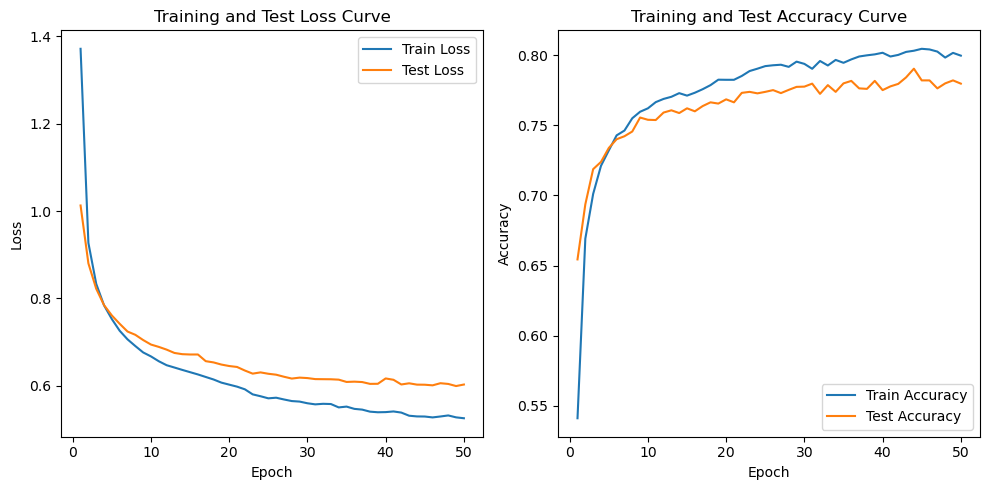

Best accuracy: 0.7903340440653873


In [88]:
#messing with encoder - 2 layers
model = vpnClassifier(rff_on=False, num_layers=2, aggregation_on=False, heads=1)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model.parameters(), lr=0.0001)

epochs = 50
train_losses = []
train_accuracies = []
test_losses = []
test_accuracies = []
for t in range(epochs):
  train_loss, train_accuracy = train(train_dataloader, model, loss_fn, optimizer)
  test_loss, test_accuracy = test(test_dataloader, model, loss_fn)
  train_losses.append(train_loss)
  train_accuracies.append(train_accuracy)
  test_losses.append(test_loss)
  test_accuracies.append(test_accuracy)
  print(f"Epoch {t+1}/{epochs}, Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}, Train Accuracy: {train_accuracy:.4f}, Test Accuracy: {test_accuracy:.4f}")

# Plotting the loss curves
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, epochs+1), train_losses, label='Train Loss')
plt.plot(range(1, epochs+1), test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Test Loss Curve')
plt.legend()

# Plotting the accuracy curves
plt.subplot(1, 2, 2)
plt.plot(range(1, epochs+1), train_accuracies, label='Train Accuracy')
plt.plot(range(1, epochs+1), test_accuracies, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Test Accuracy Curve')
plt.legend()

plt.tight_layout()
plt.show()

print(f"Best accuracy: {max(test_accuracies)}")

Epoch 1/50, Train Loss: 1.2658, Test Loss: 0.9933, Train Accuracy: 0.5646, Test Accuracy: 0.6523
Epoch 2/50, Train Loss: 0.9167, Test Loss: 0.8796, Train Accuracy: 0.6725, Test Accuracy: 0.6955
Epoch 3/50, Train Loss: 0.8350, Test Loss: 0.8291, Train Accuracy: 0.6953, Test Accuracy: 0.7006
Epoch 4/50, Train Loss: 0.7899, Test Loss: 0.7970, Train Accuracy: 0.7094, Test Accuracy: 0.7191
Epoch 5/50, Train Loss: 0.7609, Test Loss: 0.7717, Train Accuracy: 0.7254, Test Accuracy: 0.7265
Epoch 6/50, Train Loss: 0.7409, Test Loss: 0.7526, Train Accuracy: 0.7366, Test Accuracy: 0.7370
Epoch 7/50, Train Loss: 0.7228, Test Loss: 0.7373, Train Accuracy: 0.7396, Test Accuracy: 0.7342
Epoch 8/50, Train Loss: 0.7086, Test Loss: 0.7275, Train Accuracy: 0.7436, Test Accuracy: 0.7402
Epoch 9/50, Train Loss: 0.6955, Test Loss: 0.7151, Train Accuracy: 0.7467, Test Accuracy: 0.7468
Epoch 10/50, Train Loss: 0.6874, Test Loss: 0.7127, Train Accuracy: 0.7478, Test Accuracy: 0.7438
Epoch 11/50, Train Loss: 0.67

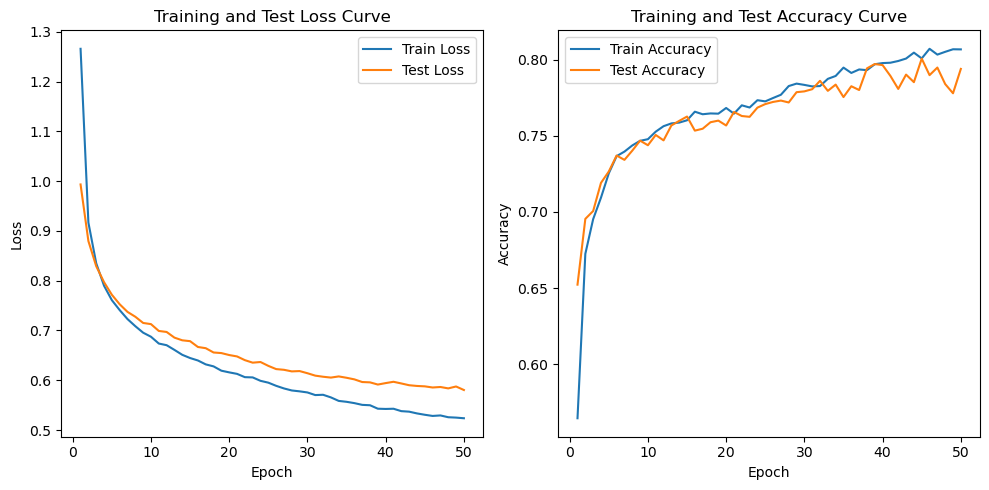

Best accuracy: 0.8006396588486141


In [89]:
#messing with encoder - 4 layers
model = vpnClassifier(rff_on=False, num_layers=4, aggregation_on=False, heads=1)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model.parameters(), lr=0.0001)

epochs = 50
train_losses = []
train_accuracies = []
test_losses = []
test_accuracies = []
for t in range(epochs):
  train_loss, train_accuracy = train(train_dataloader, model, loss_fn, optimizer)
  test_loss, test_accuracy = test(test_dataloader, model, loss_fn)
  train_losses.append(train_loss)
  train_accuracies.append(train_accuracy)
  test_losses.append(test_loss)
  test_accuracies.append(test_accuracy)
  print(f"Epoch {t+1}/{epochs}, Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}, Train Accuracy: {train_accuracy:.4f}, Test Accuracy: {test_accuracy:.4f}")

# Plotting the loss curves
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, epochs+1), train_losses, label='Train Loss')
plt.plot(range(1, epochs+1), test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Test Loss Curve')
plt.legend()

# Plotting the accuracy curves
plt.subplot(1, 2, 2)
plt.plot(range(1, epochs+1), train_accuracies, label='Train Accuracy')
plt.plot(range(1, epochs+1), test_accuracies, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Test Accuracy Curve')
plt.legend()

plt.tight_layout()
plt.show()

print(f"Best accuracy: {max(test_accuracies)}")

Epoch 1/50, Train Loss: 1.4203, Test Loss: 1.0166, Train Accuracy: 0.5202, Test Accuracy: 0.6416
Epoch 2/50, Train Loss: 0.9337, Test Loss: 0.8950, Train Accuracy: 0.6639, Test Accuracy: 0.6782
Epoch 3/50, Train Loss: 0.8506, Test Loss: 0.8447, Train Accuracy: 0.6959, Test Accuracy: 0.7013
Epoch 4/50, Train Loss: 0.8080, Test Loss: 0.8069, Train Accuracy: 0.7141, Test Accuracy: 0.7152
Epoch 5/50, Train Loss: 0.7714, Test Loss: 0.7824, Train Accuracy: 0.7260, Test Accuracy: 0.7244
Epoch 6/50, Train Loss: 0.7512, Test Loss: 0.7635, Train Accuracy: 0.7327, Test Accuracy: 0.7257
Epoch 7/50, Train Loss: 0.7334, Test Loss: 0.7509, Train Accuracy: 0.7358, Test Accuracy: 0.7315
Epoch 8/50, Train Loss: 0.7204, Test Loss: 0.7528, Train Accuracy: 0.7388, Test Accuracy: 0.7290
Epoch 9/50, Train Loss: 0.7109, Test Loss: 0.7355, Train Accuracy: 0.7427, Test Accuracy: 0.7310
Epoch 10/50, Train Loss: 0.7034, Test Loss: 0.7208, Train Accuracy: 0.7424, Test Accuracy: 0.7431
Epoch 11/50, Train Loss: 0.69

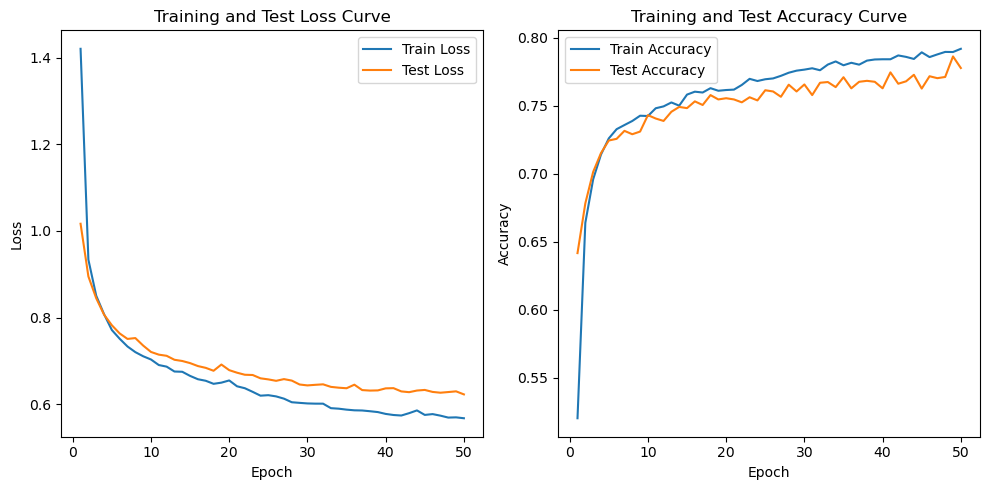

Best accuracy: 0.7862473347547975


In [90]:
#messing with encoder - 8 layers
model = vpnClassifier(rff_on=False, num_layers=8, aggregation_on=False, heads=1)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model.parameters(), lr=0.0001)

epochs = 50
train_losses = []
train_accuracies = []
test_losses = []
test_accuracies = []
for t in range(epochs):
  train_loss, train_accuracy = train(train_dataloader, model, loss_fn, optimizer)
  test_loss, test_accuracy = test(test_dataloader, model, loss_fn)
  train_losses.append(train_loss)
  train_accuracies.append(train_accuracy)
  test_losses.append(test_loss)
  test_accuracies.append(test_accuracy)
  print(f"Epoch {t+1}/{epochs}, Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}, Train Accuracy: {train_accuracy:.4f}, Test Accuracy: {test_accuracy:.4f}")

# Plotting the loss curves
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, epochs+1), train_losses, label='Train Loss')
plt.plot(range(1, epochs+1), test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Test Loss Curve')
plt.legend()

# Plotting the accuracy curves
plt.subplot(1, 2, 2)
plt.plot(range(1, epochs+1), train_accuracies, label='Train Accuracy')
plt.plot(range(1, epochs+1), test_accuracies, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Test Accuracy Curve')
plt.legend()

plt.tight_layout()
plt.show()

print(f"Best accuracy: {max(test_accuracies)}")

The performance differences as I add more encoder layers dwindles. I got the best with more than 1 but less than 8.

More paramaters is not necessarily a good thing with this dataset.

Epoch 1/50, Train Loss: 1.3206, Test Loss: 1.0385, Train Accuracy: 0.5344, Test Accuracy: 0.6493
Epoch 2/50, Train Loss: 0.9603, Test Loss: 0.9182, Train Accuracy: 0.6608, Test Accuracy: 0.6729
Epoch 3/50, Train Loss: 0.8690, Test Loss: 0.8539, Train Accuracy: 0.6793, Test Accuracy: 0.6908
Epoch 4/50, Train Loss: 0.8072, Test Loss: 0.8068, Train Accuracy: 0.7021, Test Accuracy: 0.7104
Epoch 5/50, Train Loss: 0.7694, Test Loss: 0.7737, Train Accuracy: 0.7175, Test Accuracy: 0.7138
Epoch 6/50, Train Loss: 0.7366, Test Loss: 0.7483, Train Accuracy: 0.7332, Test Accuracy: 0.7422
Epoch 7/50, Train Loss: 0.7119, Test Loss: 0.7291, Train Accuracy: 0.7426, Test Accuracy: 0.7406
Epoch 8/50, Train Loss: 0.6942, Test Loss: 0.7137, Train Accuracy: 0.7492, Test Accuracy: 0.7374
Epoch 9/50, Train Loss: 0.6738, Test Loss: 0.6925, Train Accuracy: 0.7561, Test Accuracy: 0.7520
Epoch 10/50, Train Loss: 0.6540, Test Loss: 0.6826, Train Accuracy: 0.7617, Test Accuracy: 0.7566
Epoch 11/50, Train Loss: 0.64

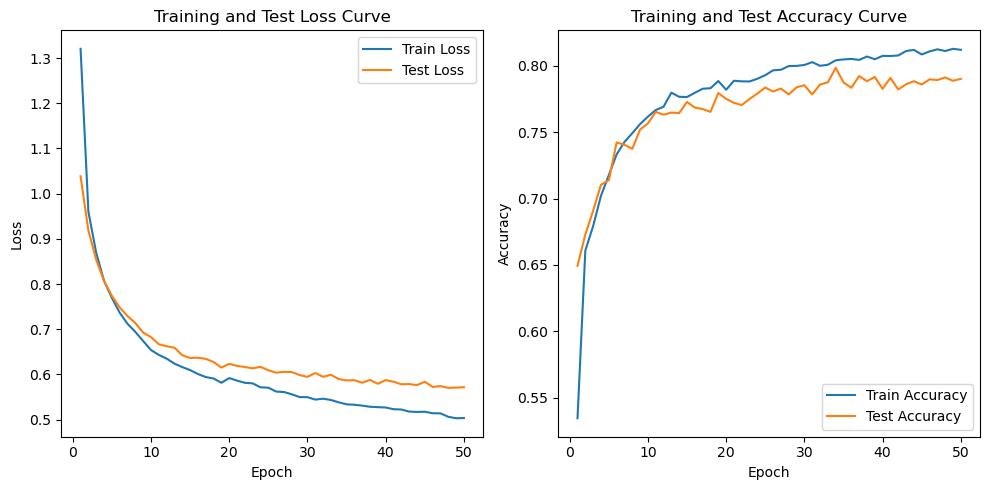

Best accuracy: 0.7985074626865671


In [91]:
#messing with # heads - 2
model = vpnClassifier(rff_on=False, num_layers=4, aggregation_on=False, heads=2)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model.parameters(), lr=0.0001)

epochs = 50
train_losses = []
train_accuracies = []
test_losses = []
test_accuracies = []
for t in range(epochs):
  train_loss, train_accuracy = train(train_dataloader, model, loss_fn, optimizer)
  test_loss, test_accuracy = test(test_dataloader, model, loss_fn)
  train_losses.append(train_loss)
  train_accuracies.append(train_accuracy)
  test_losses.append(test_loss)
  test_accuracies.append(test_accuracy)
  print(f"Epoch {t+1}/{epochs}, Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}, Train Accuracy: {train_accuracy:.4f}, Test Accuracy: {test_accuracy:.4f}")

# Plotting the loss curves
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, epochs+1), train_losses, label='Train Loss')
plt.plot(range(1, epochs+1), test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Test Loss Curve')
plt.legend()

# Plotting the accuracy curves
plt.subplot(1, 2, 2)
plt.plot(range(1, epochs+1), train_accuracies, label='Train Accuracy')
plt.plot(range(1, epochs+1), test_accuracies, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Test Accuracy Curve')
plt.legend()

plt.tight_layout()
plt.show()

print(f"Best accuracy: {max(test_accuracies)}")

Epoch 1/50, Train Loss: 1.2051, Test Loss: 1.0136, Train Accuracy: 0.5819, Test Accuracy: 0.6560
Epoch 2/50, Train Loss: 0.9451, Test Loss: 0.9111, Train Accuracy: 0.6656, Test Accuracy: 0.6791
Epoch 3/50, Train Loss: 0.8639, Test Loss: 0.8514, Train Accuracy: 0.6903, Test Accuracy: 0.6965
Epoch 4/50, Train Loss: 0.8118, Test Loss: 0.8099, Train Accuracy: 0.7039, Test Accuracy: 0.7123
Epoch 5/50, Train Loss: 0.7772, Test Loss: 0.7851, Train Accuracy: 0.7193, Test Accuracy: 0.7187
Epoch 6/50, Train Loss: 0.7493, Test Loss: 0.7585, Train Accuracy: 0.7282, Test Accuracy: 0.7265
Epoch 7/50, Train Loss: 0.7262, Test Loss: 0.7368, Train Accuracy: 0.7352, Test Accuracy: 0.7347
Epoch 8/50, Train Loss: 0.7071, Test Loss: 0.7226, Train Accuracy: 0.7459, Test Accuracy: 0.7416
Epoch 9/50, Train Loss: 0.6919, Test Loss: 0.7137, Train Accuracy: 0.7494, Test Accuracy: 0.7409
Epoch 10/50, Train Loss: 0.6804, Test Loss: 0.6979, Train Accuracy: 0.7529, Test Accuracy: 0.7491
Epoch 11/50, Train Loss: 0.66

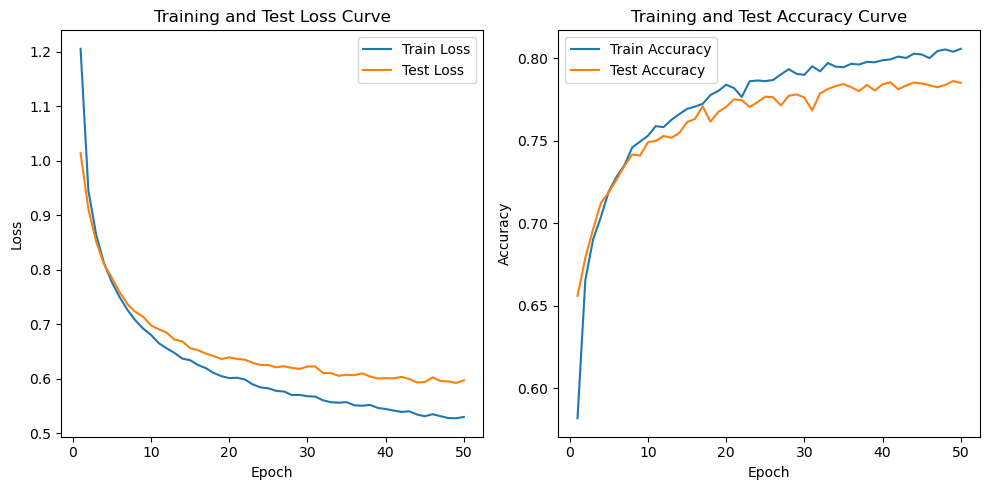

Best accuracy: 0.7860696517412935


In [92]:
#messing with # heads - 5
model = vpnClassifier(rff_on=False, num_layers=4, aggregation_on=False, heads=5)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model.parameters(), lr=0.0001)

epochs = 50
train_losses = []
train_accuracies = []
test_losses = []
test_accuracies = []
for t in range(epochs):
  train_loss, train_accuracy = train(train_dataloader, model, loss_fn, optimizer)
  test_loss, test_accuracy = test(test_dataloader, model, loss_fn)
  train_losses.append(train_loss)
  train_accuracies.append(train_accuracy)
  test_losses.append(test_loss)
  test_accuracies.append(test_accuracy)
  print(f"Epoch {t+1}/{epochs}, Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}, Train Accuracy: {train_accuracy:.4f}, Test Accuracy: {test_accuracy:.4f}")

# Plotting the loss curves
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, epochs+1), train_losses, label='Train Loss')
plt.plot(range(1, epochs+1), test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Test Loss Curve')
plt.legend()

# Plotting the accuracy curves
plt.subplot(1, 2, 2)
plt.plot(range(1, epochs+1), train_accuracies, label='Train Accuracy')
plt.plot(range(1, epochs+1), test_accuracies, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Test Accuracy Curve')
plt.legend()

plt.tight_layout()
plt.show()

print(f"Best accuracy: {max(test_accuracies)}")

Epoch 1/50, Train Loss: 1.4956, Test Loss: 1.1286, Train Accuracy: 0.5047, Test Accuracy: 0.6174
Epoch 2/50, Train Loss: 1.0514, Test Loss: 1.0052, Train Accuracy: 0.6431, Test Accuracy: 0.6644
Epoch 3/50, Train Loss: 0.9585, Test Loss: 0.9392, Train Accuracy: 0.6654, Test Accuracy: 0.6647
Epoch 4/50, Train Loss: 0.8973, Test Loss: 0.8923, Train Accuracy: 0.6734, Test Accuracy: 0.6597
Epoch 5/50, Train Loss: 0.8518, Test Loss: 0.8473, Train Accuracy: 0.6887, Test Accuracy: 0.6889
Epoch 6/50, Train Loss: 0.8145, Test Loss: 0.8128, Train Accuracy: 0.7015, Test Accuracy: 0.7189
Epoch 7/50, Train Loss: 0.7813, Test Loss: 0.7823, Train Accuracy: 0.7123, Test Accuracy: 0.7098
Epoch 8/50, Train Loss: 0.7524, Test Loss: 0.7697, Train Accuracy: 0.7213, Test Accuracy: 0.7203
Epoch 9/50, Train Loss: 0.7369, Test Loss: 0.7461, Train Accuracy: 0.7305, Test Accuracy: 0.7313
Epoch 10/50, Train Loss: 0.7213, Test Loss: 0.7310, Train Accuracy: 0.7379, Test Accuracy: 0.7385
Epoch 11/50, Train Loss: 0.71

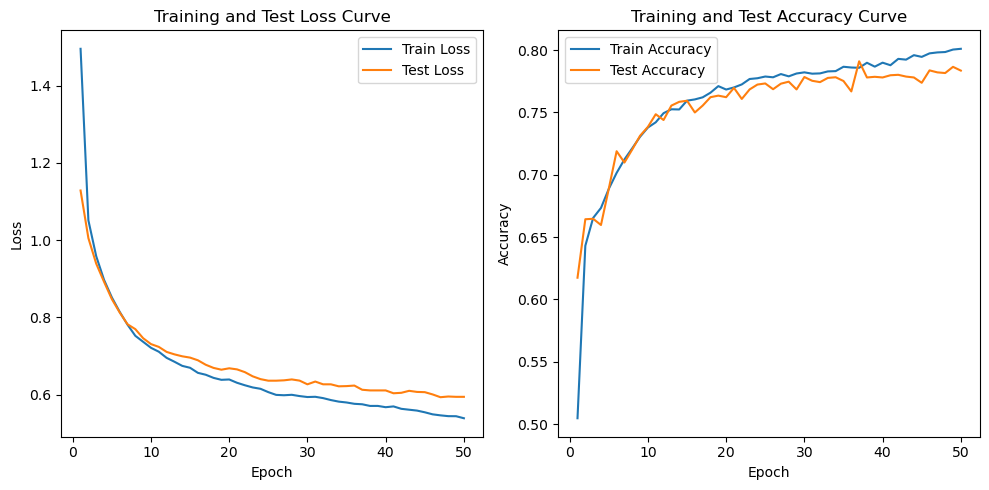

Best accuracy: 0.7910447761194029


In [93]:
#messing with # heads - 10
model = vpnClassifier(rff_on=False, num_layers=4, aggregation_on=False, heads=10)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model.parameters(), lr=0.0001)

epochs = 50
train_losses = []
train_accuracies = []
test_losses = []
test_accuracies = []
for t in range(epochs):
  train_loss, train_accuracy = train(train_dataloader, model, loss_fn, optimizer)
  test_loss, test_accuracy = test(test_dataloader, model, loss_fn)
  train_losses.append(train_loss)
  train_accuracies.append(train_accuracy)
  test_losses.append(test_loss)
  test_accuracies.append(test_accuracy)
  print(f"Epoch {t+1}/{epochs}, Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}, Train Accuracy: {train_accuracy:.4f}, Test Accuracy: {test_accuracy:.4f}")

# Plotting the loss curves
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, epochs+1), train_losses, label='Train Loss')
plt.plot(range(1, epochs+1), test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Test Loss Curve')
plt.legend()

# Plotting the accuracy curves
plt.subplot(1, 2, 2)
plt.plot(range(1, epochs+1), train_accuracies, label='Train Accuracy')
plt.plot(range(1, epochs+1), test_accuracies, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Test Accuracy Curve')
plt.legend()

plt.tight_layout()
plt.show()

print(f"Best accuracy: {max(test_accuracies)}")

More heads made little performance difference. I will probably keep the number of heads between 2-5.

"When you have several heads per layer the heads are independent of each other. This means that the model can learn different patterns with each head. For example, one head might pay most attention to the next word in each sentence, and another head might pay attention to how nouns and adjectives combine.

Having several heads per layer is similar to having several kernels in convolution.

Having several heads per layer allows one model to try out several pathways at once. It often turns out that some of the heads are not doing anything useful, but that’s OK because the later layers can learn to ignore the un-useful heads."

So again, more parameters did not help

In [25]:
#messing with forward expansion - 1
model = vpnClassifier(rff_on=False, num_layers=4, aggregation_on=False, heads=2, forward_expansion=1)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model.parameters(), lr=0.0001)

epochs = 50
train_losses = []
train_accuracies = []
test_losses = []
test_accuracies = []
for t in range(epochs):
  train_loss, train_accuracy = train(train_dataloader, model, loss_fn, optimizer)
  test_loss, test_accuracy = test(test_dataloader, model, loss_fn)
  train_losses.append(train_loss)
  train_accuracies.append(train_accuracy)
  test_losses.append(test_loss)
  test_accuracies.append(test_accuracy)
  print(f"Epoch {t+1}/{epochs}, Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}, Train Accuracy: {train_accuracy:.4f}, Test Accuracy: {test_accuracy:.4f}")

# Plotting the loss curves
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, epochs+1), train_losses, label='Train Loss')
plt.plot(range(1, epochs+1), test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Test Loss Curve')
plt.legend()

# Plotting the accuracy curves
plt.subplot(1, 2, 2)
plt.plot(range(1, epochs+1), train_accuracies, label='Train Accuracy')
plt.plot(range(1, epochs+1), test_accuracies, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Test Accuracy Curve')
plt.legend()

plt.tight_layout()
plt.show()

print(f"Best accuracy: {max(test_accuracies)}")

Epoch 1/50, Train Loss: 1.7651, Test Loss: 1.1075, Train Accuracy: 0.4401, Test Accuracy: 0.6283


KeyboardInterrupt: 

Epoch 1/50, Train Loss: 1.3058, Test Loss: 1.0144, Train Accuracy: 0.5465, Test Accuracy: 0.6537
Epoch 2/50, Train Loss: 0.9464, Test Loss: 0.8882, Train Accuracy: 0.6645, Test Accuracy: 0.6782
Epoch 3/50, Train Loss: 0.8524, Test Loss: 0.8253, Train Accuracy: 0.6909, Test Accuracy: 0.6988
Epoch 4/50, Train Loss: 0.7950, Test Loss: 0.7818, Train Accuracy: 0.7044, Test Accuracy: 0.7157
Epoch 5/50, Train Loss: 0.7538, Test Loss: 0.7481, Train Accuracy: 0.7175, Test Accuracy: 0.7262
Epoch 6/50, Train Loss: 0.7288, Test Loss: 0.7439, Train Accuracy: 0.7271, Test Accuracy: 0.7226
Epoch 7/50, Train Loss: 0.7104, Test Loss: 0.7147, Train Accuracy: 0.7369, Test Accuracy: 0.7372
Epoch 8/50, Train Loss: 0.6969, Test Loss: 0.7068, Train Accuracy: 0.7415, Test Accuracy: 0.7413
Epoch 9/50, Train Loss: 0.6809, Test Loss: 0.6921, Train Accuracy: 0.7473, Test Accuracy: 0.7568
Epoch 10/50, Train Loss: 0.6700, Test Loss: 0.6846, Train Accuracy: 0.7543, Test Accuracy: 0.7520
Epoch 11/50, Train Loss: 0.65

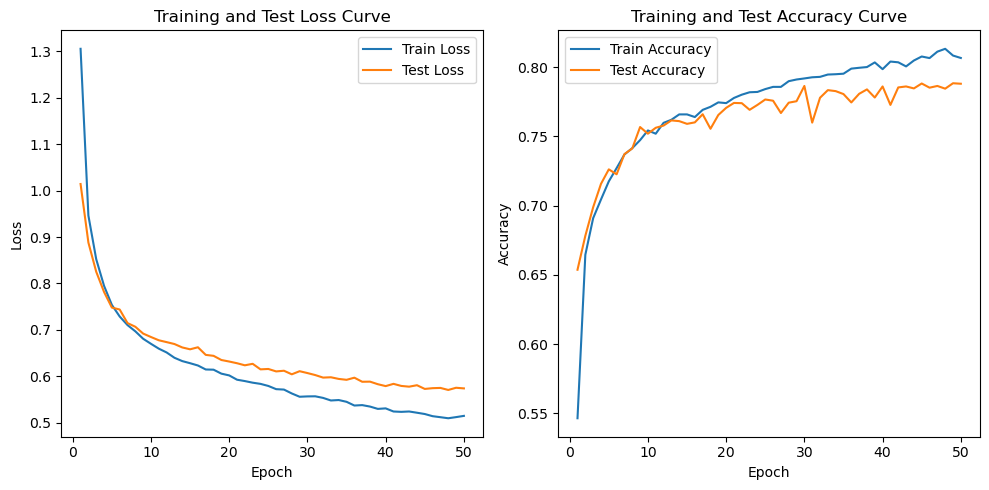

Best accuracy: 0.7883795309168443


In [95]:
#messing with forward expansion - 10
model = vpnClassifier(rff_on=False, num_layers=4, aggregation_on=False, heads=2, forward_expansion=10)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model.parameters(), lr=0.0001)

epochs = 50
train_losses = []
train_accuracies = []
test_losses = []
test_accuracies = []
for t in range(epochs):
  train_loss, train_accuracy = train(train_dataloader, model, loss_fn, optimizer)
  test_loss, test_accuracy = test(test_dataloader, model, loss_fn)
  train_losses.append(train_loss)
  train_accuracies.append(train_accuracy)
  test_losses.append(test_loss)
  test_accuracies.append(test_accuracy)
  print(f"Epoch {t+1}/{epochs}, Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}, Train Accuracy: {train_accuracy:.4f}, Test Accuracy: {test_accuracy:.4f}")

# Plotting the loss curves
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, epochs+1), train_losses, label='Train Loss')
plt.plot(range(1, epochs+1), test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Test Loss Curve')
plt.legend()

# Plotting the accuracy curves
plt.subplot(1, 2, 2)
plt.plot(range(1, epochs+1), train_accuracies, label='Train Accuracy')
plt.plot(range(1, epochs+1), test_accuracies, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Test Accuracy Curve')
plt.legend()

plt.tight_layout()
plt.show()

print(f"Best accuracy: {max(test_accuracies)}")

Greater forward expansion means a wider MLP in the encoder essentially again, creating more parameters that were not useful for learning

In [28]:
#messing with rff transformation. sigma = 2. increasing learning rate
model = vpnClassifier(rff_on=True, sigma=2,
                      num_layers=4, aggregation_on=False, heads=2, forward_expansion=4)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model.parameters(), lr=0.001)

epochs = 50
train_losses = []
train_accuracies = []
test_losses = []
test_accuracies = []
for t in range(epochs):
  train_loss, train_accuracy = train(train_dataloader, model, loss_fn, optimizer)
  test_loss, test_accuracy = test(test_dataloader, model, loss_fn)
  train_losses.append(train_loss)
  train_accuracies.append(train_accuracy)
  test_losses.append(test_loss)
  test_accuracies.append(test_accuracy)
  print(f"Epoch {t+1}/{epochs}, Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}, Train Accuracy: {train_accuracy:.4f}, Test Accuracy: {test_accuracy:.4f}")

# Plotting the loss curves
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, epochs+1), train_losses, label='Train Loss')
plt.plot(range(1, epochs+1), test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Test Loss Curve')
plt.legend()

# Plotting the accuracy curves
plt.subplot(1, 2, 2)
plt.plot(range(1, epochs+1), train_accuracies, label='Train Accuracy')
plt.plot(range(1, epochs+1), test_accuracies, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Test Accuracy Curve')
plt.legend()

plt.tight_layout()
plt.show()

print(f"Best accuracy: {max(test_accuracies)}")

Epoch 1/50, Train Loss: 1.4602, Test Loss: 1.2355, Train Accuracy: 0.4797, Test Accuracy: 0.5421
Epoch 2/50, Train Loss: 1.1655, Test Loss: 1.1662, Train Accuracy: 0.5583, Test Accuracy: 0.5691
Epoch 3/50, Train Loss: 1.0467, Test Loss: 1.1126, Train Accuracy: 0.6065, Test Accuracy: 0.5798
Epoch 4/50, Train Loss: 0.9350, Test Loss: 1.0911, Train Accuracy: 0.6491, Test Accuracy: 0.5880
Epoch 5/50, Train Loss: 0.8454, Test Loss: 1.0990, Train Accuracy: 0.6853, Test Accuracy: 0.5869
Epoch 6/50, Train Loss: 0.7566, Test Loss: 1.0816, Train Accuracy: 0.7228, Test Accuracy: 0.5984
Epoch 7/50, Train Loss: 0.6524, Test Loss: 1.1127, Train Accuracy: 0.7710, Test Accuracy: 0.6075


KeyboardInterrupt: 

In [106]:
#messing with rff transformation. sigma = 4. increasing learning rate
model = vpnClassifier(rff_on=True, sigma=4,
                      num_layers=4, aggregation_on=False, heads=2, forward_expansion=4)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model.parameters(), lr=0.001)

epochs = 50
train_losses = []
train_accuracies = []
test_losses = []
test_accuracies = []
for t in range(epochs):
  train_loss, train_accuracy = train(train_dataloader, model, loss_fn, optimizer)
  test_loss, test_accuracy = test(test_dataloader, model, loss_fn)
  train_losses.append(train_loss)
  train_accuracies.append(train_accuracy)
  test_losses.append(test_loss)
  test_accuracies.append(test_accuracy)
  print(f"Epoch {t+1}/{epochs}, Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}, Train Accuracy: {train_accuracy:.4f}, Test Accuracy: {test_accuracy:.4f}")

# Plotting the loss curves
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, epochs+1), train_losses, label='Train Loss')
plt.plot(range(1, epochs+1), test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Test Loss Curve')
plt.legend()

# Plotting the accuracy curves
plt.subplot(1, 2, 2)
plt.plot(range(1, epochs+1), train_accuracies, label='Train Accuracy')
plt.plot(range(1, epochs+1), test_accuracies, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Test Accuracy Curve')
plt.legend()

plt.tight_layout()
plt.show()

print(f"Best accuracy: {max(test_accuracies)}")

Epoch 1/50, Train Loss: 1.4497, Test Loss: 1.2876, Train Accuracy: 0.4813, Test Accuracy: 0.5279
Epoch 2/50, Train Loss: 1.1905, Test Loss: 1.2273, Train Accuracy: 0.5513, Test Accuracy: 0.5394
Epoch 3/50, Train Loss: 1.0769, Test Loss: 1.1638, Train Accuracy: 0.5897, Test Accuracy: 0.5659
Epoch 4/50, Train Loss: 0.9678, Test Loss: 1.1615, Train Accuracy: 0.6310, Test Accuracy: 0.5768
Epoch 5/50, Train Loss: 0.8594, Test Loss: 1.1501, Train Accuracy: 0.6772, Test Accuracy: 0.5691
Epoch 6/50, Train Loss: 0.7505, Test Loss: 1.1268, Train Accuracy: 0.7257, Test Accuracy: 0.5899
Epoch 7/50, Train Loss: 0.6433, Test Loss: 1.1288, Train Accuracy: 0.7724, Test Accuracy: 0.5867
Epoch 8/50, Train Loss: 0.5288, Test Loss: 1.1839, Train Accuracy: 0.8233, Test Accuracy: 0.5778
Epoch 9/50, Train Loss: 0.4491, Test Loss: 1.2178, Train Accuracy: 0.8522, Test Accuracy: 0.5910
Epoch 10/50, Train Loss: 0.3790, Test Loss: 1.2767, Train Accuracy: 0.8816, Test Accuracy: 0.5794
Epoch 11/50, Train Loss: 0.30

KeyboardInterrupt: 

Epoch 1/50, Train Loss: 1.5409, Test Loss: 1.3537, Train Accuracy: 0.4545, Test Accuracy: 0.5156
Epoch 2/50, Train Loss: 1.3380, Test Loss: 1.3656, Train Accuracy: 0.5054, Test Accuracy: 0.5222
Epoch 3/50, Train Loss: 1.2878, Test Loss: 1.2421, Train Accuracy: 0.5238, Test Accuracy: 0.5442
Epoch 4/50, Train Loss: 1.2381, Test Loss: 1.2193, Train Accuracy: 0.5375, Test Accuracy: 0.5494
Epoch 5/50, Train Loss: 1.1979, Test Loss: 1.1544, Train Accuracy: 0.5506, Test Accuracy: 0.5608
Epoch 6/50, Train Loss: 1.1687, Test Loss: 1.1288, Train Accuracy: 0.5633, Test Accuracy: 0.5832
Epoch 7/50, Train Loss: 1.1493, Test Loss: 1.1551, Train Accuracy: 0.5681, Test Accuracy: 0.5782
Epoch 8/50, Train Loss: 1.1294, Test Loss: 1.1115, Train Accuracy: 0.5771, Test Accuracy: 0.5839
Epoch 9/50, Train Loss: 1.1091, Test Loss: 1.1060, Train Accuracy: 0.5769, Test Accuracy: 0.5878
Epoch 10/50, Train Loss: 1.0828, Test Loss: 1.0739, Train Accuracy: 0.5880, Test Accuracy: 0.6023
Epoch 11/50, Train Loss: 1.07

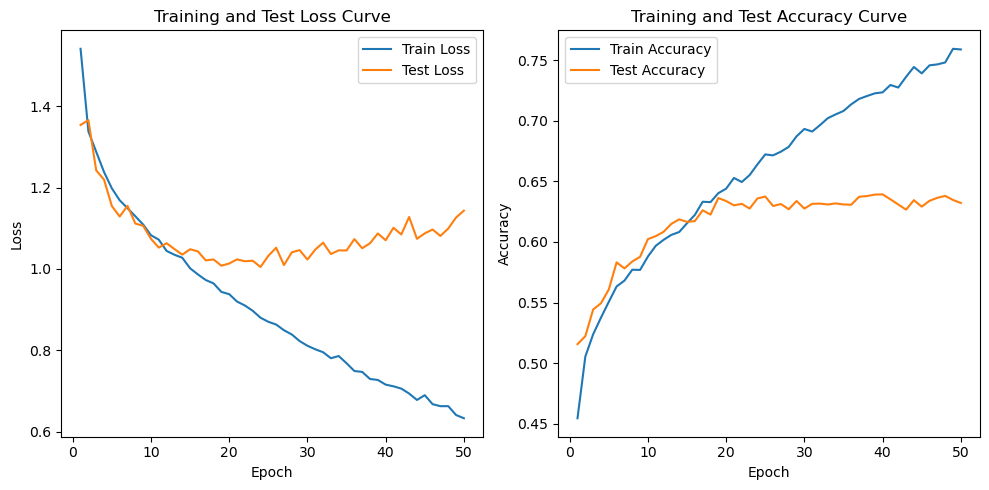

Best accuracy: 0.6393034825870647


In [108]:
#messing with rff transformation. adding dropout
model = vpnClassifier(rff_on=True, sigma=2, embedding_dropout=0.5,
                      num_layers=4, aggregation_on=False, heads=2, forward_expansion=4)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model.parameters(), lr=0.001)

epochs = 50
train_losses = []
train_accuracies = []
test_losses = []
test_accuracies = []
for t in range(epochs):
  train_loss, train_accuracy = train(train_dataloader, model, loss_fn, optimizer)
  test_loss, test_accuracy = test(test_dataloader, model, loss_fn)
  train_losses.append(train_loss)
  train_accuracies.append(train_accuracy)
  test_losses.append(test_loss)
  test_accuracies.append(test_accuracy)
  print(f"Epoch {t+1}/{epochs}, Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}, Train Accuracy: {train_accuracy:.4f}, Test Accuracy: {test_accuracy:.4f}")

# Plotting the loss curves
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, epochs+1), train_losses, label='Train Loss')
plt.plot(range(1, epochs+1), test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Test Loss Curve')
plt.legend()

# Plotting the accuracy curves
plt.subplot(1, 2, 2)
plt.plot(range(1, epochs+1), train_accuracies, label='Train Accuracy')
plt.plot(range(1, epochs+1), test_accuracies, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Test Accuracy Curve')
plt.legend()

plt.tight_layout()
plt.show()

print(f"Best accuracy: {max(test_accuracies)}")

Epoch 1/50, Train Loss: 1.8900, Test Loss: 1.5568, Train Accuracy: 0.3159, Test Accuracy: 0.4739
Epoch 2/50, Train Loss: 1.5818, Test Loss: 1.4852, Train Accuracy: 0.4321, Test Accuracy: 0.5027
Epoch 3/50, Train Loss: 1.5093, Test Loss: 1.4291, Train Accuracy: 0.4688, Test Accuracy: 0.5131
Epoch 4/50, Train Loss: 1.4635, Test Loss: 1.4015, Train Accuracy: 0.4785, Test Accuracy: 0.5178
Epoch 5/50, Train Loss: 1.4309, Test Loss: 1.3929, Train Accuracy: 0.4903, Test Accuracy: 0.5160
Epoch 6/50, Train Loss: 1.4118, Test Loss: 1.3738, Train Accuracy: 0.4931, Test Accuracy: 0.5194
Epoch 7/50, Train Loss: 1.3848, Test Loss: 1.3504, Train Accuracy: 0.5024, Test Accuracy: 0.5231
Epoch 8/50, Train Loss: 1.3695, Test Loss: 1.3435, Train Accuracy: 0.5075, Test Accuracy: 0.5229
Epoch 9/50, Train Loss: 1.3639, Test Loss: 1.3277, Train Accuracy: 0.5018, Test Accuracy: 0.5265
Epoch 10/50, Train Loss: 1.3471, Test Loss: 1.3103, Train Accuracy: 0.5049, Test Accuracy: 0.5258
Epoch 11/50, Train Loss: 1.34

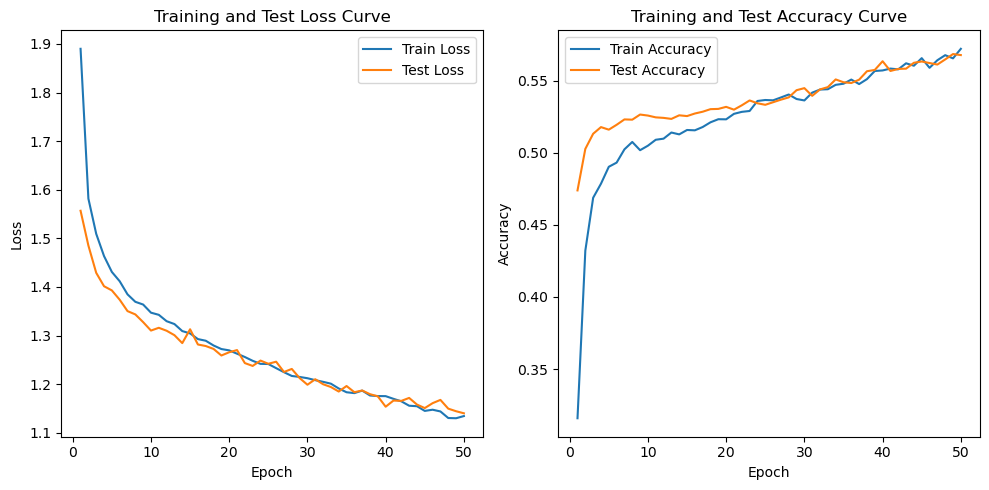

Best accuracy: 0.568407960199005


In [109]:
#messing with rff transformation. adding dropout and decreasing learning rate
model = vpnClassifier(rff_on=True, sigma=2, embedding_dropout=0.5,
                      num_layers=4, aggregation_on=False, heads=2, forward_expansion=4)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model.parameters(), lr=0.0001)

epochs = 50
train_losses = []
train_accuracies = []
test_losses = []
test_accuracies = []
for t in range(epochs):
  train_loss, train_accuracy = train(train_dataloader, model, loss_fn, optimizer)
  test_loss, test_accuracy = test(test_dataloader, model, loss_fn)
  train_losses.append(train_loss)
  train_accuracies.append(train_accuracy)
  test_losses.append(test_loss)
  test_accuracies.append(test_accuracy)
  print(f"Epoch {t+1}/{epochs}, Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}, Train Accuracy: {train_accuracy:.4f}, Test Accuracy: {test_accuracy:.4f}")

# Plotting the loss curves
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, epochs+1), train_losses, label='Train Loss')
plt.plot(range(1, epochs+1), test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Test Loss Curve')
plt.legend()

# Plotting the accuracy curves
plt.subplot(1, 2, 2)
plt.plot(range(1, epochs+1), train_accuracies, label='Train Accuracy')
plt.plot(range(1, epochs+1), test_accuracies, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Test Accuracy Curve')
plt.legend()

plt.tight_layout()
plt.show()

print(f"Best accuracy: {max(test_accuracies)}")

Epoch 1/50, Train Loss: 2.0206, Test Loss: 1.6072, Train Accuracy: 0.2971, Test Accuracy: 0.4691
Epoch 2/50, Train Loss: 1.6206, Test Loss: 1.5088, Train Accuracy: 0.4245, Test Accuracy: 0.5005
Epoch 3/50, Train Loss: 1.5174, Test Loss: 1.4957, Train Accuracy: 0.4609, Test Accuracy: 0.5005
Epoch 4/50, Train Loss: 1.4720, Test Loss: 1.4038, Train Accuracy: 0.4778, Test Accuracy: 0.5163
Epoch 5/50, Train Loss: 1.4291, Test Loss: 1.4156, Train Accuracy: 0.4893, Test Accuracy: 0.5142
Epoch 6/50, Train Loss: 1.3950, Test Loss: 1.3903, Train Accuracy: 0.4982, Test Accuracy: 0.5167
Epoch 7/50, Train Loss: 1.3735, Test Loss: 1.3876, Train Accuracy: 0.5069, Test Accuracy: 0.5190
Epoch 8/50, Train Loss: 1.3483, Test Loss: 1.3659, Train Accuracy: 0.5113, Test Accuracy: 0.5245
Epoch 9/50, Train Loss: 1.3183, Test Loss: 1.3215, Train Accuracy: 0.5208, Test Accuracy: 0.5279
Epoch 10/50, Train Loss: 1.3097, Test Loss: 1.3296, Train Accuracy: 0.5171, Test Accuracy: 0.5267
Epoch 11/50, Train Loss: 1.29

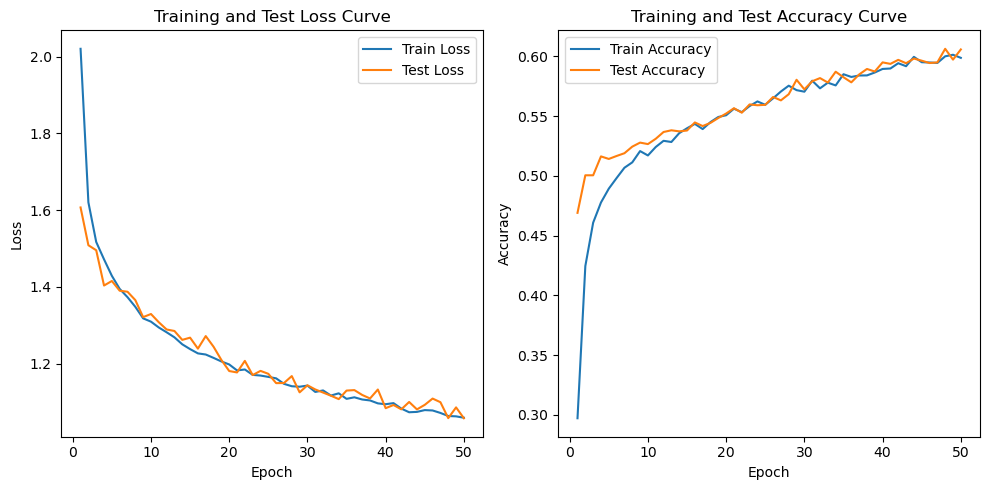

Best accuracy: 0.6064321250888415


In [110]:
#messing with rff transformation. trying the amsgrad varient
model = vpnClassifier(rff_on=True, sigma=2, embedding_dropout=0.5,
                      num_layers=4, aggregation_on=False, heads=2, forward_expansion=4)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model.parameters(), lr=0.0001,amsgrad=True)

epochs = 50
train_losses = []
train_accuracies = []
test_losses = []
test_accuracies = []
for t in range(epochs):
  train_loss, train_accuracy = train(train_dataloader, model, loss_fn, optimizer)
  test_loss, test_accuracy = test(test_dataloader, model, loss_fn)
  train_losses.append(train_loss)
  train_accuracies.append(train_accuracy)
  test_losses.append(test_loss)
  test_accuracies.append(test_accuracy)
  print(f"Epoch {t+1}/{epochs}, Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}, Train Accuracy: {train_accuracy:.4f}, Test Accuracy: {test_accuracy:.4f}")

# Plotting the loss curves
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, epochs+1), train_losses, label='Train Loss')
plt.plot(range(1, epochs+1), test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Test Loss Curve')
plt.legend()

# Plotting the accuracy curves
plt.subplot(1, 2, 2)
plt.plot(range(1, epochs+1), train_accuracies, label='Train Accuracy')
plt.plot(range(1, epochs+1), test_accuracies, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Test Accuracy Curve')
plt.legend()

plt.tight_layout()
plt.show()

print(f"Best accuracy: {max(test_accuracies)}")

Epoch 1/150, Train Loss: 1.8961, Test Loss: 1.6083, Train Accuracy: 0.3200, Test Accuracy: 0.4726
Epoch 2/150, Train Loss: 1.6071, Test Loss: 1.4928, Train Accuracy: 0.4311, Test Accuracy: 0.4883
Epoch 3/150, Train Loss: 1.4898, Test Loss: 1.4603, Train Accuracy: 0.4708, Test Accuracy: 0.5028
Epoch 4/150, Train Loss: 1.4522, Test Loss: 1.4065, Train Accuracy: 0.4809, Test Accuracy: 0.5050
Epoch 5/150, Train Loss: 1.4183, Test Loss: 1.3804, Train Accuracy: 0.4851, Test Accuracy: 0.5144
Epoch 6/150, Train Loss: 1.3947, Test Loss: 1.3804, Train Accuracy: 0.4964, Test Accuracy: 0.5158
Epoch 7/150, Train Loss: 1.3773, Test Loss: 1.3849, Train Accuracy: 0.5014, Test Accuracy: 0.5135
Epoch 8/150, Train Loss: 1.3589, Test Loss: 1.3563, Train Accuracy: 0.5030, Test Accuracy: 0.5176
Epoch 9/150, Train Loss: 1.3435, Test Loss: 1.3433, Train Accuracy: 0.5071, Test Accuracy: 0.5167
Epoch 10/150, Train Loss: 1.3344, Test Loss: 1.3447, Train Accuracy: 0.5113, Test Accuracy: 0.5156
Epoch 11/150, Train

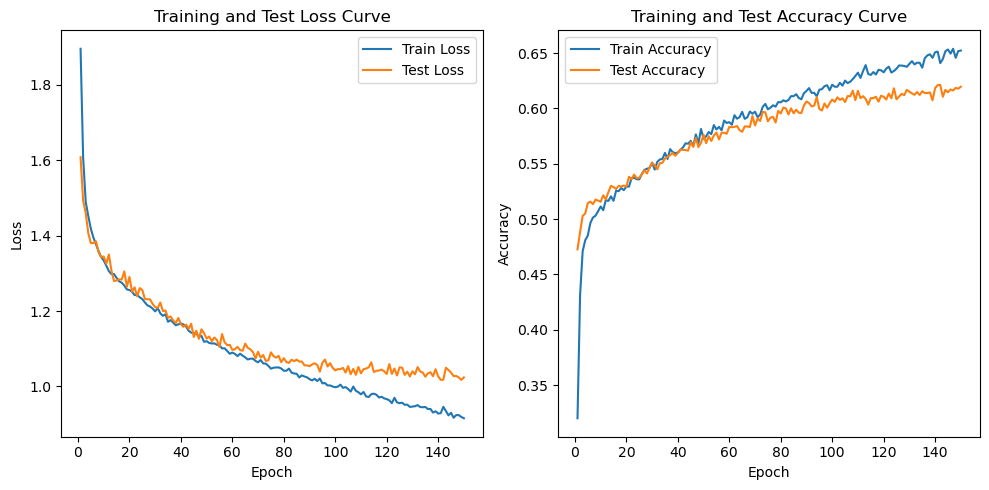

Best accuracy: 0.6211798152096659


In [111]:
#messing with rff transformation. training for more epochs. 
model = vpnClassifier(rff_on=True, sigma=2, embedding_dropout=0.5,
                      num_layers=4, aggregation_on=False, heads=2, forward_expansion=4)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model.parameters(), lr=0.0001,amsgrad=True)

epochs = 150
train_losses = []
train_accuracies = []
test_losses = []
test_accuracies = []
for t in range(epochs):
  train_loss, train_accuracy = train(train_dataloader, model, loss_fn, optimizer)
  test_loss, test_accuracy = test(test_dataloader, model, loss_fn)
  train_losses.append(train_loss)
  train_accuracies.append(train_accuracy)
  test_losses.append(test_loss)
  test_accuracies.append(test_accuracy)
  print(f"Epoch {t+1}/{epochs}, Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}, Train Accuracy: {train_accuracy:.4f}, Test Accuracy: {test_accuracy:.4f}")

# Plotting the loss curves
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, epochs+1), train_losses, label='Train Loss')
plt.plot(range(1, epochs+1), test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Test Loss Curve')
plt.legend()

# Plotting the accuracy curves
plt.subplot(1, 2, 2)
plt.plot(range(1, epochs+1), train_accuracies, label='Train Accuracy')
plt.plot(range(1, epochs+1), test_accuracies, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Test Accuracy Curve')
plt.legend()

plt.tight_layout()
plt.show()

print(f"Best accuracy: {max(test_accuracies)}")

It appears that a RFF transformation 